In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/dat.csv")

In [ ]:
# Display the updated DataFrame columns to confirm
data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
1,2,743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
2,3,866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
3,4,775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
4,5,810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"


In [ ]:


# Find columns with missing values
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]

# Total count of missing values
total_missing_values = missing_values.sum()

# Find numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Display results
print("Columns with Missing Values:")
print(missing_columns)


print(f"\nTotal Count of Missing Values: {total_missing_values}")



Columns with Missing Values:
occupation                                     27
peptic.ulcer.disease                            2
moderate.to.severe.chronic.kidney.disease       2
liver.disease                                   1
CCI.score                                       5
                                             ... 
partial.oxygen.pressure                      1015
oxyhemoglobin                                1016
anion.gap                                    1015
free.calcium                                 1015
total.hemoglobin                             1016
Length: 116, dtype: int64

Total Count of Missing Values: 63753


In [ ]:
# Find numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Count of numerical columns
numerical_columns_count = len(numerical_columns)



print("\nNumerical Columns:")
print(numerical_columns)

print(f"\nCount of Numerical Columns: {numerical_columns_count}")



Numerical Columns:
['Unnamed: 0', 'inpatient.number', 'visit.times', 'body.temperature', 'pulse', 'respiration', 'systolic.blood.pressure', 'diastolic.blood.pressure', 'map', 'weight', 'height', 'BMI', 'myocardial.infarction', 'congestive.heart.failure', 'peripheral.vascular.disease', 'cerebrovascular.disease', 'dementia', 'Chronic.obstructive.pulmonary.disease', 'connective.tissue.disease', 'peptic.ulcer.disease', 'diabetes', 'moderate.to.severe.chronic.kidney.disease', 'hemiplegia', 'leukemia', 'malignant.lymphoma', 'solid.tumor', 'liver.disease', 'AIDS', 'CCI.score', 'eye.opening', 'verbal.response', 'movement', 'fio2', 'acute.renal.failure', 'LVEF', 'left.ventricular.end.diastolic.diameter.LV', 'mitral.valve.EMS', 'mitral.valve.AMS', 'EA', 'tricuspid.valve.return.velocity', 'tricuspid.valve.return.pressure', 'death.within.28.days', 're.admission.within.28.days', 'death.within.3.months', 're.admission.within.3.months', 'death.within.6.months', 're.admission.within.6.months', 'time.

In [ ]:
# Find categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Count of categorical columns
categorical_columns_count = len(categorical_columns)

# Display the result
print("Categorical Columns:")
print(categorical_columns)

print(f"\nCount of Categorical Columns: {categorical_columns_count}")


Categorical Columns:
['DestinationDischarge', 'admission.ward', 'admission.way', 'occupation', 'discharge.department', 'gender', 'type.of.heart.failure', 'NYHA.cardiac.function.classification', 'Killip.grade', 'type.II.respiratory.failure', 'consciousness', 'respiratory.support.', 'oxygen.inhalation', 'outcome.during.hospitalization', 'ageCat']

Count of Categorical Columns: 15


In [ ]:
# Perform one-hot encoding for the 'Killip.grade' column
one_hot_encoded = pd.get_dummies(data['Killip.grade'], prefix='Killip.grade')

# Combine the one-hot encoded columns back into the original DataFrame
data = pd.concat([data, one_hot_encoded], axis=1)

# Display the updated DataFrame columns to confirm
data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,...,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat,Killip.grade_I,Killip.grade_II,Killip.grade_III,Killip.grade_IV
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,...,17.8,1.14,125.0,15,11,"(69,79]",False,False,True,False
1,2,743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,...,NaN,NaN,NaN,15,8,"(69,79]",True,False,False,False
2,3,866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,...,NaN,NaN,NaN,15,5,"(59,69]",False,True,False,False
3,4,775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,...,NaN,NaN,NaN,15,11,"(69,79]",False,True,False,False
4,5,810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,...,NaN,NaN,NaN,15,5,"(69,79]",False,True,False,False


In [ ]:
# Reset the index to ensure unique labels

# Now perform the bitwise OR operation
data['heart.failure'] = data['myocardial.infarction'] | data['Killip.grade_II'] | data['Killip.grade_III'] | data['Killip.grade_IV']

In [ ]:
target=data['heart.failure']

In [ ]:
data = pd.concat([data, target], axis=1)

In [ ]:
data.to_csv('/content/dat.csv', index=False)

In [ ]:
column_to_check = 'heart.failure'
if column_to_check in data.columns:
    print(f"'{column_to_check}' exists in the DataFrame.")
else:
    print(f"'{column_to_check}' does not exist in the DataFrame.")

'heart.failure' exists in the DataFrame.


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Function to preprocess the dataset
def preprocess_dataset(data):
    # Drop specific columns
    cols_to_drop = ['Killip.grade_II','Killip.grade_III','Killip.grade_IV', 'myocardial.infraction']
    data = data.drop(columns=[col for col in cols_to_drop if col in data.columns], errors='ignore')

    # Separate numerical and categorical columns
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = data.select_dtypes(include=['object']).columns.tolist()



    # Handle missing values in categorical columns with mode
    for col in cat_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)

    # Apply one-hot encoding to categorical columns
    if cat_cols:
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoded_cols = pd.DataFrame(
            encoder.fit_transform(data[cat_cols]),
            columns=encoder.get_feature_names_out(cat_cols),
            index=data.index
        )
        data = pd.concat([data.drop(columns=cat_cols), encoded_cols], axis=1)

    # Normalize numerical columns
    if num_cols:
        scaler = MinMaxScaler()
        data[num_cols] = scaler.fit_transform(data[num_cols])

    return data

# Load the dataset
data = pd.read_csv('/content/dat.csv')

# Preprocess the dataset
processed_data = preprocess_dataset(data)

# Save the processed dataset
processed_file_path = '/content/processed_dat.csv'
processed_data.to_csv(processed_file_path, index=False)

# Output the path to the processed file
print(f"Processed dataset saved to: {processed_file_path}")

<ipython-input-25-bcc414f5be2a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Processed dataset saved to: /content/processed_dat.csv


In [ ]:
df=pd.read_csv('/content/processed_dat.csv')

In [ ]:
column_to_check = 'heart.failure'
if column_to_check in df.columns:
    print(f"'{column_to_check}' exists in the DataFrame.")
else:
    print(f"'{column_to_check}' does not exist in the DataFrame.")

'heart.failure' exists in the DataFrame.


In [ ]:
df.head()

,Unnamed: 0,inpatient.number,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,...,oxygen.inhalation_OxygenTherapy,outcome.during.hospitalization_Dead,outcome.during.hospitalization_DischargeAgainstOrder,"ageCat_(29,39]","ageCat_(39,49]","ageCat_(49,59]","ageCat_(59,69]","ageCat_(69,79]","ageCat_(79,89]","ageCat_(89,110]"
0,0.000000,0.738883,0.00,0.242857,0.439394,0.527778,0.404762,0.438356,0.422794,0.434783,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000498,0.114161,0.00,0.257143,0.479798,0.500000,0.595238,0.479452,0.533088,0.443478,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000997,0.785927,0.25,0.214286,0.494949,0.500000,0.404762,0.458904,0.433824,0.608696,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.001495,0.293041,0.00,0.142857,0.368687,0.527778,0.436508,0.506849,0.474265,0.565217,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.001993,0.479324,0.00,0.000000,0.444444,0.527778,0.531746,0.424658,0.474265,0.660870,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


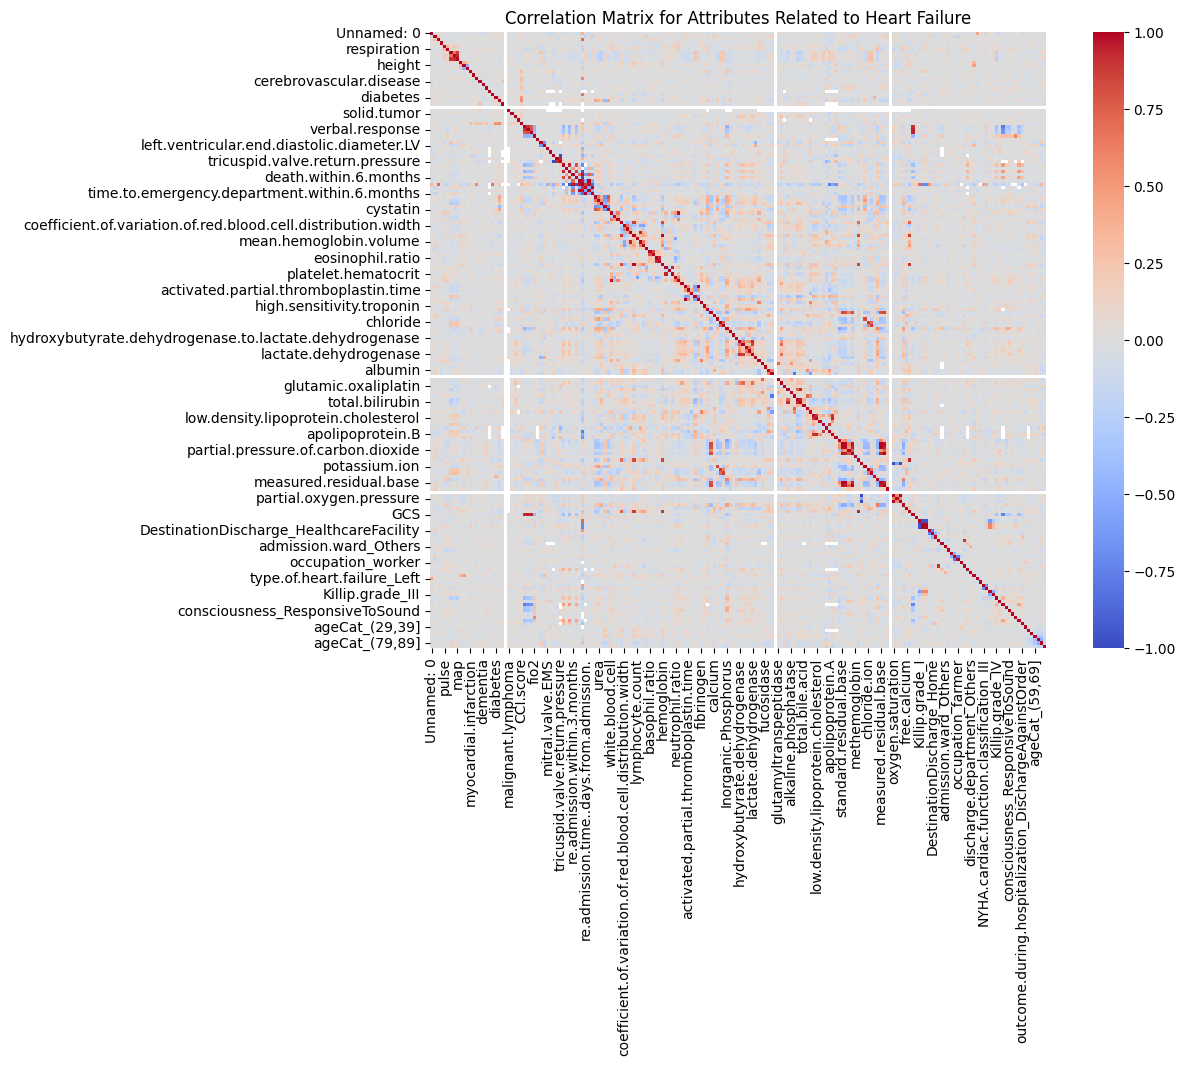

In [ ]:
# @title Default title text
if 'heart.failure' in df.columns:
    correlation_matrix = df.corr()
    relevant_corr = correlation_matrix['heart.failure'].sort_values(ascending=False)

    # Plot heatmap for the relevant correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix for Attributes Related to Heart Failure')
    plt.show()

    # Display the sorted correlations
    print(relevant_corr)
else:
    print("Target column 'heart_failure' not found in the dataset. Please ensure it is present.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
RANDOM_STATE = 42


heart.failure                              1.000000
heart.failure.1                            1.000000
Killip.grade_II                            0.589552
Killip.grade_III                           0.283223
NYHA.cardiac.function.classification_IV    0.187621
                                             ...   
time.of.death..days.from.admission.       -0.711817
Killip.grade_I                            -0.964002
leukemia                                        NaN
cholinesterase                                  NaN
body.temperature.blood.gas                      NaN
Name: heart.failure, Length: 192, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
# Update the target column name
target_column = 'heart.failure'

# Create a subset with relevant features and the target variable
relevant_columns = [
    'ageCat', 'gender', 'body.temperature', 'oxygen.saturation',
    'partial.oxygen.pressure', 'total.hemoglobin', 'free.calcium',
    'anion.gap', 'admission.way', 'visit.times', 'discharge.department',
    'admission.ward', 'GCS','diabetes','liver.disease','AIDS','congestive.heart.failure',target_column
]

# Filter the dataset
heart_failure_data = data[relevant_columns]

# Display the first few rows of the subset

#The line above is replaced with the line below to display the dataframe
display(heart_failure_data.head())

,ageCat,gender,body.temperature,oxygen.saturation,partial.oxygen.pressure,total.hemoglobin,free.calcium,anion.gap,admission.way,visit.times,discharge.department,admission.ward,GCS,diabetes,liver.disease,AIDS,congestive.heart.failure,heart.failure
0,"(69,79]",Male,36.7,97.0,93.0,125.0,1.14,17.8,NonEmergency,1,Cardiology,Cardiology,15,1,0.0,0,0,True
1,"(69,79]",Female,36.8,NaN,NaN,NaN,NaN,NaN,NonEmergency,1,Cardiology,Cardiology,15,0,0.0,0,0,False
2,"(59,69]",Male,36.5,NaN,NaN,NaN,NaN,NaN,NonEmergency,2,Cardiology,Cardiology,15,0,0.0,0,0,True
3,"(69,79]",Male,36.0,NaN,NaN,NaN,NaN,NaN,Emergency,1,Cardiology,Cardiology,15,0,0.0,0,0,True
4,"(69,79]",Female,35.0,NaN,NaN,NaN,NaN,NaN,NonEmergency,1,Cardiology,Cardiology,15,0,0.0,0,0,True


In [ ]:
# Check for NaN values in each column
nan_columns = heart_failure_data.isna().any()

# Display columns with NaN values
nan_columns_with_names = nan_columns[nan_columns].index.tolist()
print(f"Columns with NaN values: {nan_columns_with_names}")


Columns with NaN values: ['oxygen.saturation', 'partial.oxygen.pressure', 'total.hemoglobin', 'free.calcium', 'anion.gap', 'liver.disease']


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Replace NaN with mean
heart_failure_data[['liver.disease']] = imputer.fit_transform(heart_failure_data[['liver.disease']])

<ipython-input-35-6c037add1b59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_data[['liver.disease']] = imputer.fit_transform(heart_failure_data[['liver.disease']])


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Replace NaN with mean
heart_failure_data[['oxygen.saturation']] = imputer.fit_transform(heart_failure_data[['oxygen.saturation']])

<ipython-input-36-84686faea055>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_data[['oxygen.saturation']] = imputer.fit_transform(heart_failure_data[['oxygen.saturation']])


In [ ]:
imputer = KNNImputer(n_neighbors=5)
heart_failure_data[['free.calcium']] = imputer.fit_transform(heart_failure_data[['free.calcium']])

<ipython-input-37-dbd353f02d5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_data[['free.calcium']] = imputer.fit_transform(heart_failure_data[['free.calcium']])


In [ ]:
heart_failure_data[['partial.oxygen.pressure']] = imputer.fit_transform(heart_failure_data[['partial.oxygen.pressure']])

<ipython-input-38-cddd784eeee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_data[['partial.oxygen.pressure']] = imputer.fit_transform(heart_failure_data[['partial.oxygen.pressure']])


In [ ]:
imputer = KNNImputer(n_neighbors=5)
heart_failure_data[['total.hemoglobin']] = imputer.fit_transform(heart_failure_data[['total.hemoglobin']])

<ipython-input-39-83b5fc9fcb38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_data[['total.hemoglobin']] = imputer.fit_transform(heart_failure_data[['total.hemoglobin']])


In [ ]:
heart_failure_data[['anion.gap']] = imputer.fit_transform(heart_failure_data[['anion.gap']])

<ipython-input-40-f37a48654591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_failure_data[['anion.gap']] = imputer.fit_transform(heart_failure_data[['anion.gap']])


In [ ]:
display(heart_failure_data.head())

,ageCat,gender,body.temperature,oxygen.saturation,partial.oxygen.pressure,total.hemoglobin,free.calcium,anion.gap,admission.way,visit.times,discharge.department,admission.ward,GCS,diabetes,liver.disease,AIDS,congestive.heart.failure,heart.failure
0,"(69,79]",Male,36.7,97.000000,93.000000,125.00000,1.140000,17.800000,NonEmergency,1,Cardiology,Cardiology,15,1,0.0,0,0,True
1,"(69,79]",Female,36.8,95.806647,108.121853,124.08871,1.110393,14.022457,NonEmergency,1,Cardiology,Cardiology,15,0,0.0,0,0,False
2,"(59,69]",Male,36.5,95.806647,108.121853,124.08871,1.110393,14.022457,NonEmergency,2,Cardiology,Cardiology,15,0,0.0,0,0,True
3,"(69,79]",Male,36.0,95.806647,108.121853,124.08871,1.110393,14.022457,Emergency,1,Cardiology,Cardiology,15,0,0.0,0,0,True
4,"(69,79]",Female,35.0,95.806647,108.121853,124.08871,1.110393,14.022457,NonEmergency,1,Cardiology,Cardiology,15,0,0.0,0,0,True


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

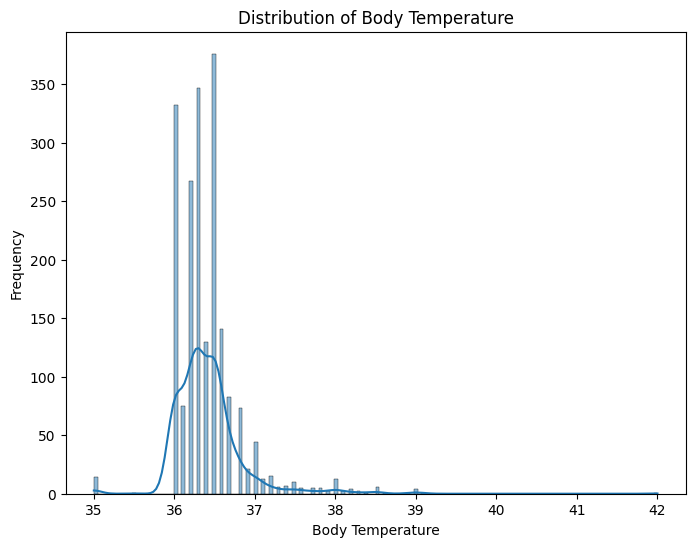

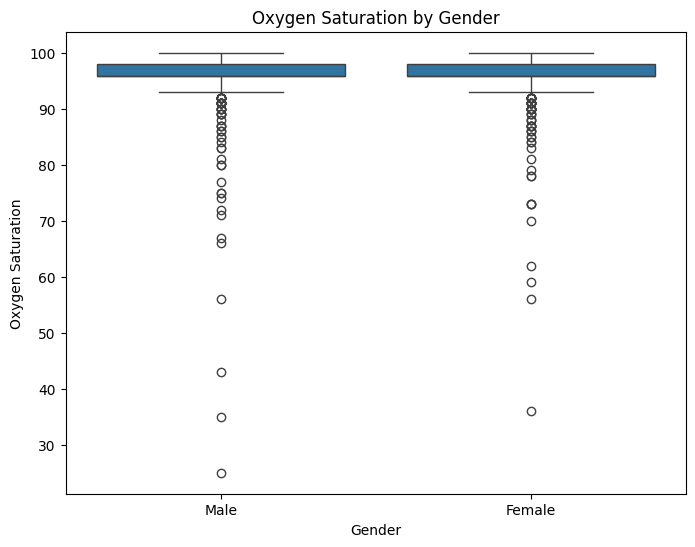

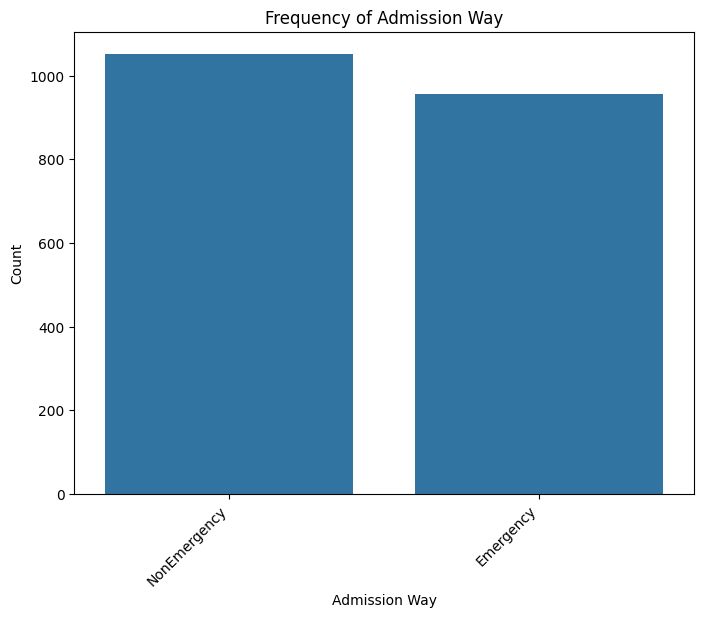

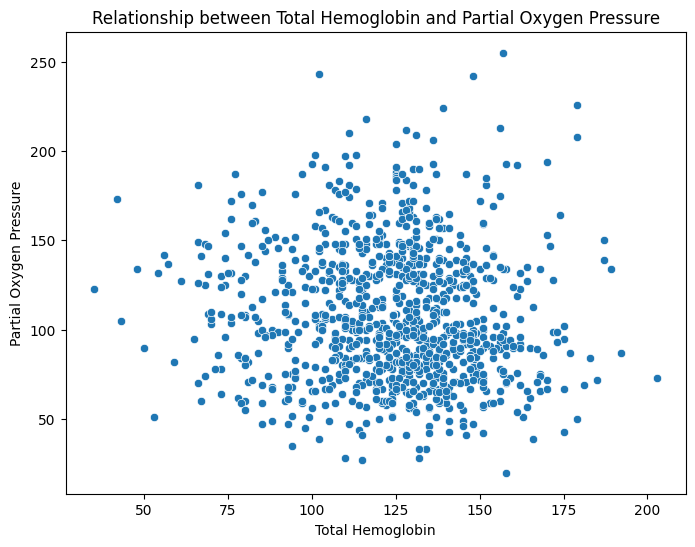

In [ ]:
# Histogram for a numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(heart_failure_data['body.temperature'], kde=True)
plt.title('Distribution of Body Temperature')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

# Box plot for comparing a numerical feature across categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='oxygen.saturation', data=heart_failure_data)
plt.title('Oxygen Saturation by Gender')
plt.xlabel('Gender')
plt.ylabel('Oxygen Saturation')
plt.show()

# Bar plot for a categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(x='admission.way', data=heart_failure_data)
plt.title('Frequency of Admission Way')
plt.xlabel('Admission Way')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Scatter plot for two numerical features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total.hemoglobin', y='partial.oxygen.pressure', data=heart_failure_data)
plt.title('Relationship between Total Hemoglobin and Partial Oxygen Pressure')
plt.xlabel('Total Hemoglobin')
plt.ylabel('Partial Oxygen Pressure')
plt.show()

In [ ]:
cat_variables = ['ageCat',
'gender',
'admission.way',
'admission.ward',
'discharge.department',

]

In [ ]:
df = pd.get_dummies(data = heart_failure_data,
                         prefix = cat_variables,
                         columns = cat_variables)

In [ ]:
df.head()

,body.temperature,oxygen.saturation,partial.oxygen.pressure,total.hemoglobin,free.calcium,anion.gap,visit.times,GCS,diabetes,liver.disease,...,admission.way_Emergency,admission.way_NonEmergency,admission.ward_Cardiology,admission.ward_GeneralWard,admission.ward_ICU,admission.ward_Others,discharge.department_Cardiology,discharge.department_GeneralWard,discharge.department_ICU,discharge.department_Others
0,36.7,97.000000,93.000000,125.00000,1.140000,17.800000,1,15,1,0.0,...,False,True,True,False,False,False,True,False,False,False
1,36.8,95.806647,108.121853,124.08871,1.110393,14.022457,1,15,0,0.0,...,False,True,True,False,False,False,True,False,False,False
2,36.5,95.806647,108.121853,124.08871,1.110393,14.022457,2,15,0,0.0,...,False,True,True,False,False,False,True,False,False,False
3,36.0,95.806647,108.121853,124.08871,1.110393,14.022457,1,15,0,0.0,...,True,False,True,False,False,False,True,False,False,False
4,35.0,95.806647,108.121853,124.08871,1.110393,14.022457,1,15,0,0.0,...,False,True,True,False,False,False,True,False,False,False


In [ ]:
# Check for invalid feature names containing special characters
invalid_features = [col for col in df.columns if any(char in col for char in ['[', ']', '<'])]
print("Invalid feature names:", invalid_features)

# Check for non-string feature names
non_string_features = [col for col in df.columns if not isinstance(col, str)]
print("Non-string feature names:", non_string_features)

Invalid feature names: ['ageCat_(21,29]', 'ageCat_(29,39]', 'ageCat_(39,49]', 'ageCat_(49,59]', 'ageCat_(59,69]', 'ageCat_(69,79]', 'ageCat_(79,89]', 'ageCat_(89,110]']
Non-string feature names: []


In [ ]:
df.columns = df.columns.str.replace(r"[\[\]<]", "", regex=True)
df.columns = df.columns.astype(str)

In [ ]:
features = [x for x in df.columns if x not in 'heart.failure']



now dataset splitting

In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['heart.failure'], train_size = 0.8, random_state = RANDOM_STATE)


In [ ]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 1606
validation samples: 402
target proportion: 0.7559


In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

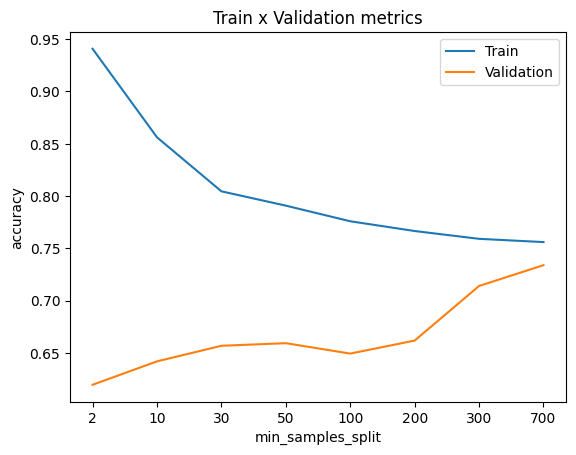

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

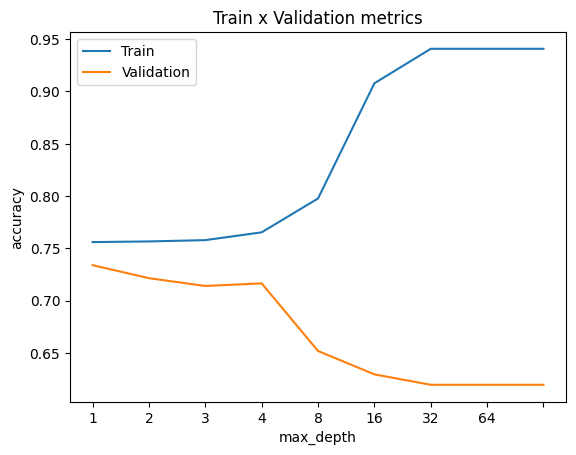

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [ ]:
y_train_pred = decision_tree_model.predict(X_train)
y_val_pred = decision_tree_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Confusion Matrix and Classification Report for Decision Tree
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix (Validation Data):")
print(conf_matrix)

print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

print(f"Metrics Train:\n\tAccuracy Score: {train_accuracy:.4f}")
print(f"Metrics Validation:\n\tAccuracy Score: {val_accuracy:.4f}")





Confusion Matrix (Validation Data):
[[  7 100]
 [ 15 280]]

Classification Report (Validation Data):
              precision    recall  f1-score   support

       False       0.32      0.07      0.11       107
        True       0.74      0.95      0.83       295

    accuracy                           0.71       402
   macro avg       0.53      0.51      0.47       402
weighted avg       0.63      0.71      0.64       402

Metrics Train:
	Accuracy Score: 0.7578
Metrics Validation:
	Accuracy Score: 0.7139


In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

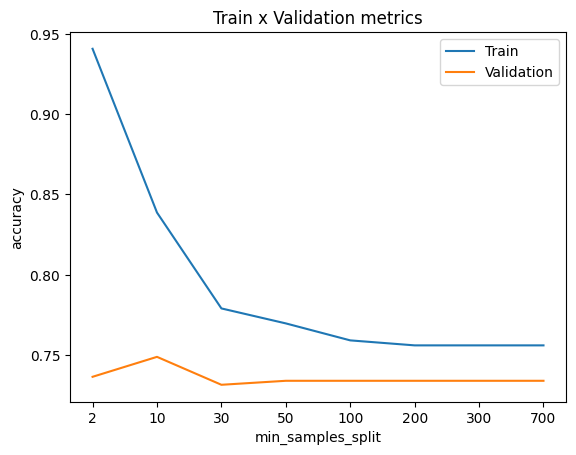

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

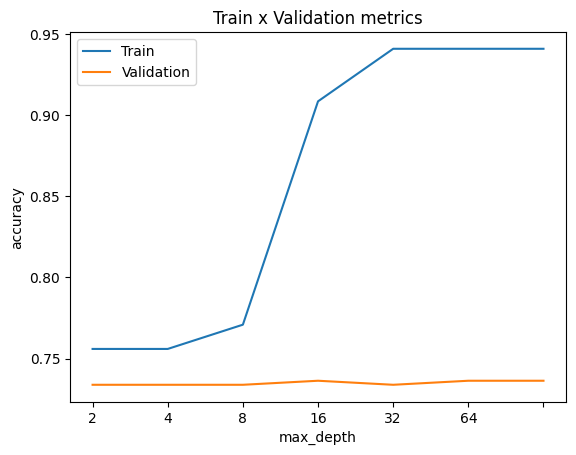

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

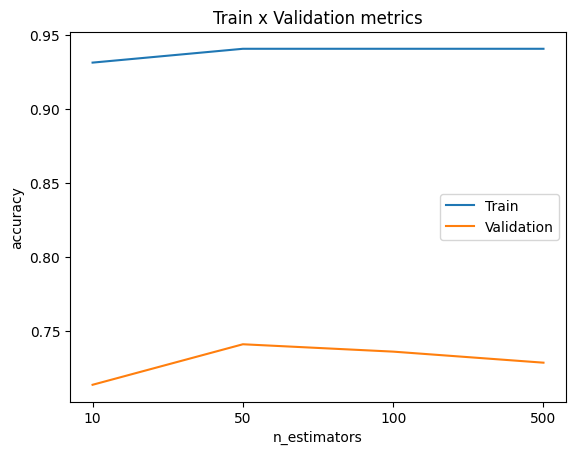

In [ ]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 8,
                                             min_samples_split = 10,
                                             min_samples_leaf=5,
                                             class_weight='balanced').fit(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
y_train_pred = random_forest_model.predict(X_train)
y_val_pred = random_forest_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Confusion Matrix and Classification Report for Validation Data
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix (Validation Data):")
print(conf_matrix)

print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))
print(f"Metrics Train:\n\tAccuracy Score: {train_accuracy:.4f}")
print(f"Metrics Validation:\n\tAccuracy Score: {val_accuracy:.4f}")



Confusion Matrix (Validation Data):
[[ 61  46]
 [ 96 199]]

Classification Report (Validation Data):
              precision    recall  f1-score   support

       False       0.39      0.57      0.46       107
        True       0.81      0.67      0.74       295

    accuracy                           0.65       402
   macro avg       0.60      0.62      0.60       402
weighted avg       0.70      0.65      0.66       402

Metrics Train:
	Accuracy Score: 0.6899
Metrics Validation:
	Accuracy Score: 0.6468


In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\n metrics train: \n Validation score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.6899
 metrics train: 
 Validation score: 0.6468


In [ ]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]


In [ ]:
!pip install --upgrade xgboost

In [ ]:
!pip install scikit-learn==1.2.2


In [ ]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])


[0]	validation_0-logloss:0.52997
[1]	validation_0-logloss:0.52870
[2]	validation_0-logloss:0.52766
[3]	validation_0-logloss:0.52833
[4]	validation_0-logloss:0.52959
[5]	validation_0-logloss:0.52895
[6]	validation_0-logloss:0.53064
[7]	validation_0-logloss:0.53062
[8]	validation_0-logloss:0.53055
[9]	validation_0-logloss:0.52790
[10]	validation_0-logloss:0.52721
[11]	validation_0-logloss:0.52698
[12]	validation_0-logloss:0.52798
[13]	validation_0-logloss:0.52809
[14]	validation_0-logloss:0.52844
[15]	validation_0-logloss:0.52905
[16]	validation_0-logloss:0.53025
[17]	validation_0-logloss:0.53018
[18]	validation_0-logloss:0.53064
[19]	validation_0-logloss:0.52985
[20]	validation_0-logloss:0.52986


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [ ]:
xgb_model.best_iteration

11

In [ ]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.7609
Metrics test:
	Accuracy score: 0.7289


In [ ]:
y_train_pred = xgb_model.predict(X_train)
y_val_pred = xgb_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("\nClassification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))

print(f"Metrics Train:\n\tAccuracy Score: {train_accuracy:.4f}")
print(f"Metrics Validation:\n\tAccuracy Score: {val_accuracy:.4f}")

# Confusion Matrix and Classification Report for Validation Data
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix (Validation Data):")
print(conf_matrix)




Classification Report (Validation Data):
              precision    recall  f1-score   support

       False       0.25      0.01      0.02       107
        True       0.73      0.99      0.84       295

    accuracy                           0.73       402
   macro avg       0.49      0.50      0.43       402
weighted avg       0.60      0.73      0.62       402

Metrics Train:
	Accuracy Score: 0.7609
Metrics Validation:
	Accuracy Score: 0.7289

Confusion Matrix (Validation Data):
[[  1 106]
 [  3 292]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Creating and training the SVM model with K-Fold cross-validation
svm_model = SVC(kernel='linear', random_state=42)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Training the model with cross-validation
scores = cross_val_score(svm_model, X_train, y_train, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", scores)
print(f"Mean Cross-validation Accuracy: {scores.mean() * 100:.2f}%")

# Fitting the model on the training data
svm_model.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = svm_model.predict(X_val)



Cross-validation scores: [0.7484472  0.74766355 0.76323988 0.74143302 0.77258567]
Mean Cross-validation Accuracy: 75.47%


In [ ]:
# Calculating training accuracy for SVM
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
print(f"SVM Training Accuracy: {svm_train_accuracy * 100:.2f}%")

# Calculating validation accuracy
svm_val_accuracy = accuracy_score(y_val, y_pred)
print(f"SVM Validation Accuracy: {svm_val_accuracy * 100:.2f}%")

# Generating and displaying the classification report
classification_report_output = classification_report(y_val, y_pred)
print("\nClassification Report:\n")
print(classification_report_output)

# Generating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n")
print(conf_matrix)


SVM Training Accuracy: 75.65%
SVM Validation Accuracy: 73.38%

Classification Report:

              precision    recall  f1-score   support

       False       0.50      0.01      0.02       107
        True       0.73      1.00      0.85       295

    accuracy                           0.73       402
   macro avg       0.62      0.50      0.43       402
weighted avg       0.67      0.73      0.63       402


Confusion Matrix:

[[  1 106]
 [  1 294]]
